In [1]:
import pandas as pd
import os
import numpy as np

# Change the directory to the desired path
new_directory = "E:\projects"
os.chdir(new_directory)

# Verify the current working directory has changed
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: E:\projects


In [2]:
matches = pd.read_csv("matches.csv", index_col =0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [3]:
matches.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [4]:
#Check how many values are missing in attendance column
print("Number of rows with null values in attendance column: ",matches['attendance'].isnull().sum())
#Subset the matches dataset
matches_subset = matches[matches['attendance'].notnull()]
print("Shape after removing null values: ",matches_subset.shape)

Number of rows with null values in attendance column:  696
Shape after removing null values:  (693, 27)


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      

In [6]:
matches['result'].unique()

array(['L', 'W', 'D'], dtype=object)

In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
matches['venue_enc'] = enc.fit_transform(matches['venue'])
print(matches[['venue','venue_enc']].head())

  venue  venue_enc
1  Away          0
2  Home          1
3  Home          1
4  Away          0
6  Home          1


In [9]:

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
matches['result_enc'] = enc.fit_transform(matches['result'])
print(matches[['result','result_enc']].head())

  result  result_enc
1      L           1
2      W           2
3      W           2
4      W           2
6      D           0


In [10]:
matches = pd.read_csv("matches.csv", index_col =0)
matches.head(3)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City


In [11]:
matches['formation'].unique()

array(['4-3-3', '4-2-3-1', '3-4-3', '3-5-2', '3-4-1-2', '4-2-2-2',
       '4-1-4-1', '4-4-1-1', '4-4-2◆', '4-3-2-1', '4-4-2', '3-5-1-1',
       '4-5-1', '3-4-3◆', '4-3-3◆', '4-2-3-1◆'], dtype=object)

In [12]:
formation_enc = pd.get_dummies(matches['formation'])
formation_enc.head()

,3-4-1-2,3-4-3,3-4-3◆,3-5-1-1,3-5-2,4-1-4-1,4-2-2-2,4-2-3-1,4-2-3-1◆,4-3-2-1,4-3-3,4-3-3◆,4-4-1-1,4-4-2,4-4-2◆,4-5-1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
matches['formation'].head()

1    4-3-3
2    4-3-3
3    4-3-3
4    4-3-3
6    4-3-3
Name: formation, dtype: object

In [14]:
matches["date"]=pd.to_datetime(matches["date"])
matches["day_code"] = matches["date"].dt.dayofweek

In [15]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,day_code
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,6
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,5
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,5
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,5
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,6
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,5
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,6
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,2


In [16]:
to_drop = ["season","notes","match report", "referee", "attendance", "time"]
matches_subset = matches.drop(to_drop,axis=1)
matches_subset.head()

,date,comp,round,day,venue,result,gf,ga,opponent,xg,...,captain,formation,sh,sot,dist,fk,pk,pkatt,team,day_code
1,2021-08-15,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,Fernandinho,4-3-3,18.0,4.0,16.9,1.0,0.0,0.0,Manchester City,6
2,2021-08-21,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,İlkay Gündoğan,4-3-3,16.0,4.0,17.3,1.0,0.0,0.0,Manchester City,5
3,2021-08-28,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,İlkay Gündoğan,4-3-3,25.0,10.0,14.3,0.0,0.0,0.0,Manchester City,5
4,2021-09-11,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,İlkay Gündoğan,4-3-3,25.0,8.0,14.0,0.0,0.0,0.0,Manchester City,5
6,2021-09-18,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,Fernandinho,4-3-3,16.0,1.0,15.7,1.0,0.0,0.0,Manchester City,5


In [17]:
pk_df = pd.DataFrame(matches[['pk', 'pkatt','sh','sot','fk','dist']], columns=['pk', 'pkatt','sh','sot','fk','dist'])
pk_corr = pk_df.corr()

In [18]:
pk_corr

,pk,pkatt,sh,sot,fk,dist
pk,1.000000,0.899394,-0.016095,0.004415,-0.017371,0.176801
pkatt,0.899394,1.000000,0.017829,0.014365,0.001610,0.184683
sh,-0.016095,0.017829,1.000000,0.671973,0.218640,-0.125725
sot,0.004415,0.014365,0.671973,1.000000,0.133337,-0.173293
fk,-0.017371,0.001610,0.218640,0.133337,1.000000,0.179702
dist,0.176801,0.184683,-0.125725,-0.173293,0.179702,1.000000


<Axes: >

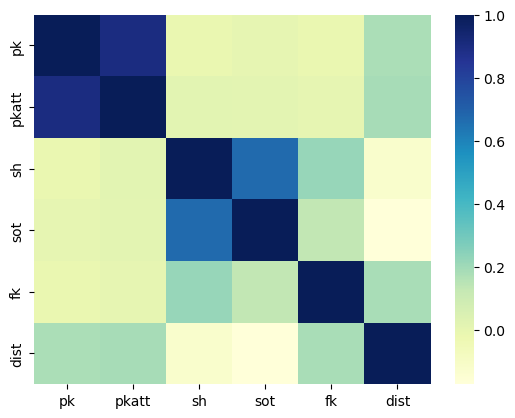

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pk_corr, cmap = 'YlGnBu')


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf= RandomForestClassifier(n_estimators = 50, min_samples_split=10,random_state=1)

In [29]:
train = matches[matches["date"]<'2021-12-30']
test = matches[matches["date"]>'2021-12-30']

matches['venue_enc'] = enc.fit_transform(matches['venue'])
matches['result_enc'] = enc.fit_transform(matches['result'])
matches['opponent_enc'] = enc.fit_transform(matches['opponent'])
matches['time_enc'] = enc.fit_transform(matches['time'])
matches['formation_enc']= enc.fit_transform(matches['formation'])
matches['referee_enc']= enc.fit_transform(matches['referee'])
predictors = ["venue_enc","day_code","opponent_enc","time_enc","formation_enc","referee_enc"]
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,day_code,venue_enc,result_enc,opponent_enc,time_enc,formation_enc,referee_enc
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,0.0,2022,Manchester City,6,0,1,18,8,10,2
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,0.0,2022,Manchester City,5,1,2,15,6,10,7
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,2022,Manchester City,5,1,2,0,1,10,13
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,2022,Manchester City,5,0,2,10,6,10,17
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,0.0,2022,Manchester City,5,1,0,17,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,2021,Sheffield United,6,0,1,18,13,0,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,2021,Sheffield United,5,1,1,6,6,4,20
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,2021,Sheffield United,6,0,2,7,12,1,10
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,0.0,2021,Sheffield United,2,0,1,14,11,1,19


In [30]:
# def get_recent_goal_data(df):
#     recent_games = matches[matches["date"] == df["date"].max()]
#     recent_goal_data = recent_games[["team", "team_goal_for", "team_goal_against", "opponent", "opponent_goal_for", "opponent_goal_against"]]

#   # Calculate the cumulative goal for for each team

#     for team in ["team"]:
#         recent_goal_data[f"{team}_goal_for_cum"] = recent_goal_data[f"{team}_goal_for"].cumsum()

#   # Add the cumulative goal for column to the original DataFrame
#     matches["team_goal_for"] = np.nan
#     matches["team_goal_for"] = matches["team"].apply(lambda x: recent_goal_data[recent_goal_data["team"] == x]["team_goal_for_cum"])

#     return matches



In [31]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,day_code,venue_enc,result_enc,opponent_enc,time_enc,formation_enc,referee_enc
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,0.0,2022,Manchester City,6,0,1,18,8,10,2
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,0.0,2022,Manchester City,5,1,2,15,6,10,7
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,2022,Manchester City,5,1,2,0,1,10,13
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,2022,Manchester City,5,0,2,10,6,10,17
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,0.0,2022,Manchester City,5,1,0,17,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,2021,Sheffield United,6,0,1,18,13,0,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,2021,Sheffield United,5,1,1,6,6,4,20
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,2021,Sheffield United,6,0,2,7,12,1,10
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,0.0,2021,Sheffield United,2,0,1,14,11,1,19


In [32]:
#from sklearn.impute import SimpleImputer

# Create an imputer with the desired strategy (e.g., mean, median, most frequent)
#imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
#train_imputed = imputer.fit_transform(train[predictors])

# Transform the test data using the fitted imputer
#test_imputed = imputer.transform(test[predictors])


In [33]:
rf.fit(train[predictors],train["result_enc"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [34]:
preds = rf.predict(test[predictors])

In [35]:
from sklearn.metrics import accuracy_score 

In [36]:
acc = accuracy_score(test["result_enc"],preds)

In [37]:
acc

0.4574468085106383

In [38]:
from sklearn.metrics import precision_score

In [39]:
precision = precision_score(test["result_enc"], preds, average='weighted')
print("Weighted Precision Score:", precision)


Weighted Precision Score: 0.42648310394823236


In [40]:
combined = pd.DataFrame(dict(actual=test["result_enc"],prediction = preds))
pd.crosstab(index=combined["actual"],columns=combined["prediction"])

prediction,0,1,2
actual,,,
0,4,24,28
1,14,65,40
2,13,34,60


In [41]:
from sklearn.metrics import f1_score

f1 = f1_score(test["result_enc"], preds, average='weighted')
print("Weighted F1 Score:", f1)


Weighted F1 Score: 0.43869979785250884


IMPROVING PRECISION AND F1 SCORE

In [42]:
grouped_matches = matches.groupby("team")

In [43]:
group = grouped_matches.get_group("Manchester United")

In [44]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,day_code,venue_enc,result_enc,opponent_enc,time_enc,formation_enc,referee_enc
0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,Leeds United,...,0.0,2022,Manchester United,5,1,2,9,1,7,17
1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1.0,1.0,Southampton,...,0.0,2022,Manchester United,6,0,0,17,3,7,4
2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1.0,0.0,Wolves,...,0.0,2022,Manchester United,6,0,2,22,8,7,16
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,1.0,Newcastle Utd,...,0.0,2022,Manchester United,5,1,2,14,6,7,2
5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2.0,1.0,West Ham,...,0.0,2022,Manchester United,6,0,2,21,3,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2021-05-09,14:05,Premier League,Matchweek 35,Sun,Away,W,3.0,1.0,Aston Villa,...,1.0,2021,Manchester United,6,0,2,1,4,7,3
56,2021-05-11,18:00,Premier League,Matchweek 36,Tue,Home,L,1.0,2.0,Leicester City,...,0.0,2021,Manchester United,1,1,1,10,11,7,4
57,2021-05-13,20:15,Premier League,Matchweek 34,Thu,Home,L,2.0,4.0,Liverpool,...,0.0,2021,Manchester United,3,1,1,11,17,7,2
58,2021-05-18,18:00,Premier League,Matchweek 37,Tue,Home,D,1.0,1.0,Fulham,...,0.0,2021,Manchester United,1,1,0,8,11,7,12


In [45]:
def rolling_averages(group,cols,new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed='left').mean() #take the current week out for calculating rolling avg
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [57]:
cols = ["gf","ga","xg","xga","poss","attendance","sh","sot","dist","fk","pk","pkatt"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'xg_rolling',
 'xga_rolling',
 'poss_rolling',
 'attendance_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [58]:
rolling_averages(group,cols,new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,xg_rolling,xga_rolling,poss_rolling,attendance_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1.0,1.0,Southampton,...,1.433333,0.766667,50.000000,29077.333333,12.666667,5.666667,19.433333,0.666667,0.333333,0.333333
2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1.0,0.0,Wolves,...,1.533333,0.766667,51.666667,36410.666667,13.333333,4.666667,16.900000,0.333333,0.333333,0.333333
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,1.0,Newcastle Utd,...,1.166667,1.066667,55.666667,45117.666667,13.666667,4.666667,16.733333,0.666667,0.000000,0.000000
5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2.0,1.0,West Ham,...,1.366667,1.100000,60.666667,45117.666667,15.333333,4.000000,17.500000,0.666667,0.000000,0.000000
7,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Home,L,0.0,1.0,Aston Villa,...,1.500000,1.366667,60.333333,54451.000000,16.000000,6.333333,18.333333,0.333333,0.000000,0.000000
9,2021-10-02,12:30,Premier League,Matchweek 7,Sat,Home,D,1.0,1.0,Everton,...,2.066667,1.166667,61.000000,68551.333333,21.666667,6.666667,18.533333,0.666667,0.000000,0.333333
10,2021-10-16,15:00,Premier League,Matchweek 8,Sat,Away,L,2.0,4.0,Leicester City,...,1.666667,1.300000,63.666667,68683.333333,19.000000,6.666667,16.666667,0.666667,0.000000,0.333333
12,2021-10-24,16:30,Premier League,Matchweek 9,Sun,Home,L,0.0,5.0,Liverpool,...,1.533333,1.800000,60.333333,59423.000000,19.333333,5.333333,17.766667,0.666667,0.000000,0.333333
13,2021-10-30,17:30,Premier League,Matchweek 10,Sat,Away,W,3.0,0.0,Tottenham,...,1.266667,2.666667,53.333333,59478.333333,14.333333,5.000000,16.766667,0.000000,0.000000,0.000000
15,2021-11-06,12:30,Premier League,Matchweek 11,Sat,Home,L,0.0,2.0,Manchester City,...,1.366667,2.533333,43.333333,55221.000000,13.333333,4.333333,17.433333,0.000000,0.000000,0.000000


In [59]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [60]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 1  2021-08-22  16:30  Premier League   Matchweek 2   
                        3  2021-08-28  12:30  Premier League   Matchweek 3   
                        4  2021-09-11  15:00  Premier League   Matchweek 4   
                        5  2021-09-18  15:00  Premier League   Matchweek 5   
                        7  2021-09-26  16:30  Premier League   Matchweek 6   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 1   Sun  Home      L  0.0  2.0          Chelsea  ...   
                        3   Sat  Away      L  0.0  5.0  Manchester City  ...   
                        4   Sat  Home      W  1.0  0.0     Norwich City  ...   
                        5   Sat  Away      W  1.0  0.0          Burnley  ...   
                        7   Sun  Home      W  3.0  1.0        Tottenham  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            xg_rolling  xga_rolling  poss_rolling  \
team                                                                
Arsenal                 1     1.266667     0.900000     62.666667   
                        3     0.933333     1.533333     52.000000   
                        4     0.600000     2.666667     40.333333   
                        5     1.066667     2.433333     35.666667   
                        7     1.366667     1.900000     42.000000   
...                                ...          ...           ...   
Wolverhampton Wanderers 32    0.733333     1.866667     62.666667   
                        33    0.733333     1.333333     62.666667   
                        34    0.833333     1.200000     57.333333   
                        35    0.933333     1.600000     52.000000   
                        36    0.766667     1.966667     51.333333   

                            attendance_rolling sh_rolling sot_rolling  \
team                                                                    
Arsenal                 1         10993.000000  14.666667    3.666667   
                        3         28402.666667  14.666667    3.666667   
                        4         42494.666667   9.666667    2.333333   
                        5         56335.000000  12.333333    3.000000   
                        7         43425.333333  14.666667    3.000000   
...                                        ...        ...         ...   
Wolverhampton Wanderers 32        40333.000000  12.333333    3.666667   
                        33        33388.333333  12.333333    4.333333   
                        34        33537.333333  13.000000    5.333333   
                        35        33988.666667  13.000000    5.000000   
                        36        38339.333333  10.000000    4.666667   

                           dist_rolling fk_rolling  pk_rolling  pkatt_rolling  
team                                             

In [61]:
matches_rolling.index = range(matches_rolling.shape[0])

In [62]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,xg_rolling,xga_rolling,poss_rolling,attendance_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-08-22,16:30,Premier League,Matchweek 2,Sun,Home,L,0.0,2.0,Chelsea,...,1.266667,0.900000,62.666667,10993.000000,14.666667,3.666667,17.366667,0.666667,0.0,0.0
1,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Away,L,0.0,5.0,Manchester City,...,0.933333,1.533333,52.000000,28402.666667,14.666667,3.666667,18.700000,0.666667,0.0,0.0
2,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,1.0,0.0,Norwich City,...,0.600000,2.666667,40.333333,42494.666667,9.666667,2.333333,14.600000,0.333333,0.0,0.0
3,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Away,W,1.0,0.0,Burnley,...,1.066667,2.433333,35.666667,56335.000000,12.333333,3.000000,13.866667,0.333333,0.0,0.0
4,2021-09-26,16:30,Premier League,Matchweek 6,Sun,Home,W,3.0,1.0,Tottenham,...,1.366667,1.900000,42.000000,43425.333333,14.666667,3.000000,14.766667,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,0.733333,1.866667,62.666667,40333.000000,12.333333,3.666667,19.300000,0.000000,0.0,0.0
602,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,0.733333,1.333333,62.666667,33388.333333,12.333333,4.333333,19.600000,0.000000,0.0,0.0
603,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,0.833333,1.200000,57.333333,33537.333333,13.000000,5.333333,19.833333,0.000000,0.0,0.0
604,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,0.933333,1.600000,52.000000,33988.666667,13.000000,5.000000,18.533333,0.000000,0.0,0.0


In [63]:
def make_predictions(data, predictors):
    train = data[data["date"]<'2021-12-30']
    test = data[data["date"]>'2021-12-30']
    rf.fit(train[predictors],train["result_enc"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual= test["result_enc"],predicted = preds), index= test.index)
    precision = precision_score(test["result_enc"], preds, average='weighted')
    return combined, precision

In [64]:
combined, precision = make_predictions(matches_rolling, predictors+new_cols)

In [65]:
precision

0.43043125100479407

In [67]:
accuracy = accuracy_score(test["result_enc"], preds)
f1 = f1_score(test["result_enc"], preds, average="weighted")

In [68]:
accuracy

0.4574468085106383

In [69]:
f1

0.43869979785250884